<a href="https://colab.research.google.com/github/frank097/IA-sis420/blob/main/Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import numpy as np
from math import pi, pow
import matplotlib.pyplot as plt
#importamos las librerias necesarias

In [160]:
#--Descripción de parametros y atributos--

    #maxsol: Límite superio para generar población para valores de d y h.
    #Intervalo de solución [0,32]

    #gensize: Longitud del gen (5)

    #term: Indica el número de generaciones máximas a generar.
    #Limita la ejecución del algoritmo hasta 10 genereacioens.
    #empieza desde cero, entonces term = 9

    #best: Lista con valores iniciales para la evaluación de aptitud.
    #["indice para valor de d", "indice para valor de h"]

In [161]:
class Optimizar:
    #Constructor _init_ con atributos para la ejecución del algoritmo.
    def __init__(self, n=10, maxsol=32, gensize=5, term=9):
        self.n = n
        self.maxsol = maxsol
        self.pob = []
        self.gen = 0
        self.gensize = gensize
        self.term = term
        self.best = [100,0]
        np.random.seed()

    # Genera la población inicial para individuos según el valor de maxsol.
    # (en este caso las variables d y h)
    def generar_poblacion(self):
        # Genera pares aleatorios (dv y dh).
        #  Muestras de una distribución uniforme aleatoria
        dv = np.random.uniform(low=0, high=self.maxsol, size=self.n)
        hv = np.random.uniform(low=0, high=self.maxsol, size=self.n)

        # Posteriormente convierte d y h en binarios para cada i poblacion.
        # Llena con ceros con zfill para definir el gen de cada individuo.
        print("Población inicial generada: ")
        for i in range(len(dv)):
            d = "{0:b}".format(int(dv[i]))
            h = "{0:b}".format(int(hv[i]))
            d = d.zfill(self.gensize)
            h = h.zfill(self.gensize)
            print(str(i),":",str(d),str(h))
            #Agregar nuevo individuo a población
            self.pob.append([d,h,i])


    #Datos de entrada
    # pair: tipo de dato lista que representa el individuo.
    # pair[0]: valor de diametro (d)
    # pair[1]: para valor de altura (h)

    #"g" calcula el valor de una restricción dado un par de valores binarios
    # Definición de la función f
    # coste = 0.58
    def f(self, pair):
        d = 0.58*(float(int(pair[0],2)))
        h = float(int(pair[1],2))
        res = ((pi*pow(d,2))/2) + pi*d*h
        return res

    # "g" toma un par de valores binarios, los convierte a números de punto flotante, realiza un cálculo basado en esos valores y devuelve el resultado de la restricción.
    # Definición de la función g (restrincción)
    def g(self,pair):
        d = float(int(pair[0],2))
        h = float(int(pair[1],2))
        res = ((pi*pow(d,2)*h)/4)-300
        return res




    #  toma dos pares de individuos, selecciona un punto de cruce aleatorio en cada par y realiza el cruce, generando dos nuevos individuos mutados.
    def cross(self, pair1, pair2):
        #Se realiza el cruce dos individuos con asignación del punto de Cruce.

        #a1: valor d para 1er individuo
        #b1: valor h para 1er individuo
        a1 = pair1[0]
        b1 = pair1[1]

        #a2: valor d para 2do individuo
        #b2: valor h para 2do individuo
        a2 = pair2[0]
        b2 = pair2[1]

        #Int Random 1 - Valor d
        #Se generan Randómicos enteros entre 2 y 7
        #Esto con el fin de asignar el punto de cruce de los individuos.
        fin = np.random.randint(2,7)

        #Cruzar 1 - Generar nuevos d. Se recorre el string con _fin_
        #Se concatenan los values
        na1 = a1[:fin] + b2[fin:]
        nb1 = b1[:fin] + a2[fin:]

        #Int Random 2 - Generar nuevos h. Se recorre el string con _fin_
        #Se generan Randómicos enteros entre 2 y 7
        #Esto con el fin de asignar el punto de corte de los individuos.
        fin = np.random.randint(2,7)

        #Cruzar 2 - Generar nuevos h. Se recorre el string con _fin_
        #Se concatenan los values
        na2 = a2[:fin] + b1[fin:]
        nb2 = b2[:fin] + a1[fin:]

        #Retorna nuevo individuo tipo lista con sintaxis [d,h]
        return [[na1, nb1], [na2,nb2]]

    # recibe un par de individuos y los muta
    # Función que genera mutación de los individuos
    def mutt(self, pair):
        new = []

        #se convierte a tipo array los pares [d, h] respectivos p1 y p2
        p1 = np.array(list(pair[0]))
        p2 = np.array(list(pair[1]))

        #Shuffle revuelve los cromosomas de los individuos
        np.random.shuffle(p1)
        np.random.shuffle(p2)

        #se anida espacio en la mutación en la lista new
        #new representa el nuevo individuo mutado
        pn1 = "".join(p1)
        pn2 = "".join(p2)
        new.append(pn1)
        new.append(pn2)
        return new



  #evaluacion de cada individuo en la población y buscando la mejor solución
    #Ciclo principal
    def ejecutar(self):
        self.data = []
        while True:
            print("\n Nueva Generación ")
            #Se invoca el fitness
            for pair in self.pob:
                res = self.g(pair)
                cond = self.f(pair)


                # Guardar si es el mejor elemento en lista
                if res > 0:
                    if self.best[0] > cond:
                        self.best = [cond, pair]

                # Si no se ha alcanzado la condición de término de ejecución del programa.
                #Es decir, si hay 10 generaciones e imprime la solucion encontrada 2
                if not self.term:
                    if res > 0:
                        print("Solución encontrada 1: ", str(self.best),end=" ")
                        # print(res, cond)
                        return pair
                else:
                    if self.gen > self.term:
                        print("Detener algoritmo. Ya se generó el número máximo de generaciones.")
                        print("\n \n")
                        print("Solución encontrada  \n", str(self.best), end=" ")
                        print("Volumen:", str(100+self.g(self.best[1])))
                        print("Valor (d):", str(int(self.best[1][0],2)))
                        print("Valor (h):", str(int(self.best[1][1],2)))
                        return self.best

            # Se verifica la condición de término de generacion. Luego,  pasa a
            # crear la nueva generación si se cumple.
            new_gen = []
            i = 0
            count = 0

            # Genera nueva población por cruzamiento
            while i < ((len(self.pob))/4):

                # Selecciona aleatoria oponentes
                r = np.random.uniform(0, len(self.pob), size=2)
                j = int(r[0])
                k = int(r[1])
                #Torneo número (1)
                if self.f(self.pob[j]) < self.f(self.pob[k]):
                    winner1 = j
                else:
                    winner1 = k

                # Selecciona aleatoriamente los individuos a disputar
                r = np.random.uniform(0, len(self.pob), size=2)
                j = int(r[0])
                k = int(r[1])
                #Torneo número ()
                if self.f(self.pob[j]) < self.f(self.pob[k]):
                    winner2 = j
                else:
                    winner2 = k

                # Ahora hacemos la cruza de los mejores individuos
                elem = self.cross(self.pob[winner1], self.pob[winner2])
                elem[0].append(count)
                count += 1
                elem[1].append(count)
                count += 1

                # Agregar a la nueva generación
                new_gen.append(elem[0])
                new_gen.append(elem[1])
                i += 1
            i = 0

            #Se realiza la mutacion a través del ciclo while que
            #toma como logitud la logintud población
            while count < len(self.pob)-1:

                # Seleccionar primer individuo para mutar
                r = np.random.randint(0,len(self.pob))
                e = self.mutt(self.pob[r][:2])
                e.append(count)
                # print(e)
                new_gen.append(e)
                count += 1

                # Seleccionar segundo individuo para mutar
                r = np.random.randint(0,len(self.pob))
                e = self.mutt(self.pob[r][:2])
                e.append(count)
                new_gen.append(e)
                count += 1
                i += 1
            self.pob = new_gen
            # Se realiza la transformación a Binario
            if self.best[1] == 0:
                x1 = np.random.uniform(low=0, high=self.maxsol)
                x2 = np.random.uniform(low=0, high=self.maxsol)
                d = "{0:b}".format(int(x1))
                d = d.zfill(self.gensize)

                h = "{0:b}".format(int(x2))
                h = h.zfill(self.gensize)

                self.best[0] = self.f([d,h])
                self.best[1] = [d,h]

            # Se agregar el mejor de la generación a la próxima generación
            best = self.best[1]
            best.append(count)
            self.pob.append(best)
            self.gen += 1

            self.data.append([self.gen, self.best])
            print("Mejor solución de la generación: ", str(self.best))
            print("Volumen:", str(100+self.g(self.best[1])))
            print("Valor (d):", str(int(self.best[1][0],2)))
            print("Valor (h):", str(int(self.best[1][1],2)))
            # input();

    def dibujar(self):
        print("\n ")
        x = [i[0] for i in self.data]
        y = [int(i[1][0]) for i in self.data]
        print("Generaciones",x)
        print("Mejores elementos por generación",y)
        plt.figure(figsize=(10,5))
        plt.plot(x,y)
        plt.title("Evolución del volúmen del cilindro por cada generación")
        plt.xlabel("Generaciones")
        plt.ylabel("Volúmen de lata")
        plt.show()

    #Método que grafica los valores encontrados en forma de cilindros
    def dibujar3D(self):
        d  = int(self.best[1][0],2)
        h  = int(self.best[1][1],2)
        center = 0

        fig = plt.figure(figsize=(8,10))
        ax = Axes3D(fig, azim=30, elev=30)
        x=np.linspace(center-d, center+d, 100)
        z=np.linspace(0, h, 100)
        Xc, Zc=np.meshgrid(x, z)
        Yc = np.sqrt(d**2 -(Xc - center) ** 2) + center
        # Draw parameters
        rstride = 20
        cstride = 10
        ax.plot_surface(Xc, Yc, Zc, alpha=0.2, rstride=rstride, cstride=cstride)
        ax.plot_surface(Xc, (2*center-Yc), Zc, alpha=0.2, rstride=rstride, cstride=cstride)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title("Gráfica del cilindro con la mejor optimización de todas")

        plt.show()

In [162]:
#Creo objeto con instancia de la clase optimizar. Preparación
optimizo = Optimizar()

In [163]:
optimizo.generar_poblacion()


Población inicial generada: 
0 : 11101 10100
1 : 01010 11000
2 : 11000 00000
3 : 00110 10000
4 : 01100 00110
5 : 01100 11000
6 : 00010 00110
7 : 00010 00111
8 : 11011 01001
9 : 10000 11111


In [164]:
optimizo.ejecutar()


 Nueva Generación 
Mejor solución de la generación:  [539.3486267682956, ['10100', '01001', 10]]
Volumen: 2627.4333882308138
Valor (d): 20
Valor (h): 9

 Nueva Generación 
Mejor solución de la generación:  [207.28479655797736, ['01100', '00110', 1, 10]]
Volumen: 478.5840131753953
Valor (d): 12
Valor (h): 6

 Nueva Generación 
Mejor solución de la generación:  [150.21588104992665, ['00110', '01100', 3, 10]]
Volumen: 139.29200658769764
Valor (d): 6
Valor (h): 12

 Nueva Generación 
Mejor solución de la generación:  [150.21588104992665, ['00110', '01100', 3, 10, 10]]
Volumen: 139.29200658769764
Valor (d): 6
Valor (h): 12

 Nueva Generación 
Mejor solución de la generación:  [135.85754598595986, ['01000', '00111', 3, 10]]
Volumen: 151.85837720205683
Valor (d): 8
Valor (h): 7

 Nueva Generación 
Mejor solución de la generación:  [135.85754598595986, ['01000', '00111', 3, 10, 10]]
Volumen: 151.85837720205683
Valor (d): 8
Valor (h): 7

 Nueva Generación 
Mejor solución de la generación:  [13

[135.85754598595986, ['01000', '00111', 3, 10, 10, 10, 10, 10, 10]]


 
Generaciones [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Mejores elementos por generación [539, 207, 150, 150, 135, 135, 135, 135, 135, 135]


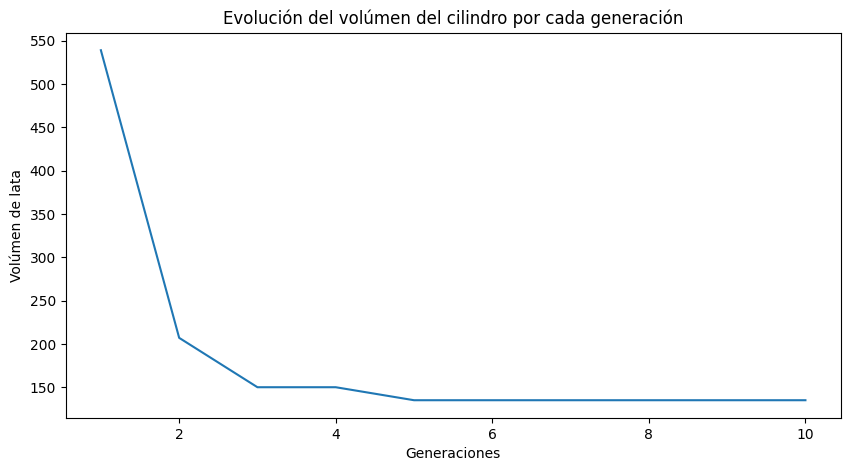

In [165]:
optimizo.dibujar()